In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('Data/year_prediction.csv')
df.sample(5)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
281577,1999,48.13236,24.40013,4.57549,-16.18695,-80.14986,-12.46164,-12.83537,-6.33058,2.49305,...,-5.73083,-93.01215,22.32165,15.17374,0.72258,54.55830,-18.04140,8.67036,97.33997,7.16479
114735,2009,50.15549,49.51728,16.75981,8.23554,7.72998,-24.25873,14.57576,7.67623,-1.88452,...,12.53207,-163.86935,62.40423,31.52153,-7.77328,24.86455,55.21914,12.10320,15.73547,6.86835
134127,1998,38.55335,-16.46469,-29.29684,15.58786,15.92572,-19.18212,-5.77102,-13.36501,13.85372,...,13.35520,42.34981,-153.50710,131.03082,2.40495,36.24921,4.22833,5.20001,-75.53269,16.15646
478795,2003,42.53230,-73.66014,27.12516,-14.26859,-33.13528,-14.53531,-7.82144,-6.71051,25.88524,...,1.55798,-375.93341,99.20993,34.63076,-17.44549,-198.13106,-114.46456,-7.52281,72.21419,-9.19769
259525,2009,47.32946,1.91105,17.82562,1.50376,19.29956,-3.61372,-3.37293,-2.95157,4.96416,...,12.87996,-113.67933,239.60489,56.35092,3.81499,116.54521,-205.98259,35.58820,-140.77109,-11.71990


In [3]:
# Group release years into decades
df['label'] = df.label.apply(lambda year : year-(year%10))

Text(0.5, 1.0, 'Samples in the dataset/release decade')

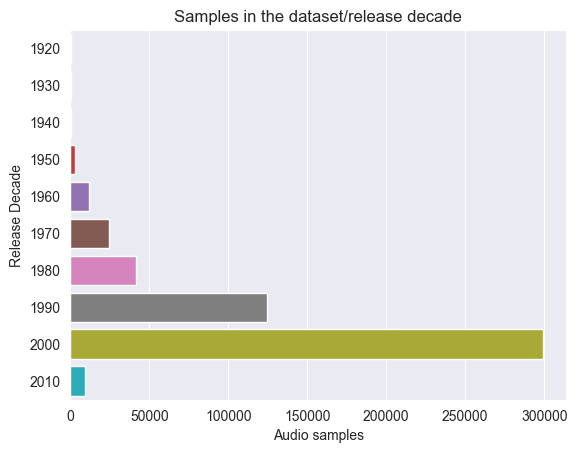

In [4]:
sns.countplot(y="label", data=df)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [5]:
df.iloc[:,1:] = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
df.iloc[:,1:].describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_t = df[df.label>1940]
min_samples = df_t.label.value_counts().min()
decades = df_t.label.unique()
df_sampled = pd.DataFrame(columns=df_t.columns)
for decade in decades:
    df_sampled = pd.concat([df_sampled, df_t[df_t.label==decade].sample(min_samples)])
df_sampled.label = df_sampled.label.astype(int)

Index(['label', 'TimbreAvg1', 'TimbreAvg2', 'TimbreAvg3', 'TimbreAvg4',
       'TimbreAvg5', 'TimbreAvg6', 'TimbreAvg7', 'TimbreAvg8', 'TimbreAvg9',
       'TimbreAvg10', 'TimbreAvg11', 'TimbreAvg12', 'TimbreCovariance1',
       'TimbreCovariance2', 'TimbreCovariance3', 'TimbreCovariance4',
       'TimbreCovariance5', 'TimbreCovariance6', 'TimbreCovariance7',
       'TimbreCovariance8', 'TimbreCovariance9', 'TimbreCovariance10',
       'TimbreCovariance11', 'TimbreCovariance12', 'TimbreCovariance13',
       'TimbreCovariance14', 'TimbreCovariance15', 'TimbreCovariance16',
       'TimbreCovariance17', 'TimbreCovariance18', 'TimbreCovariance19',
       'TimbreCovariance20', 'TimbreCovariance21', 'TimbreCovariance22',
       'TimbreCovariance23', 'TimbreCovariance24', 'TimbreCovariance25',
       'TimbreCovariance26', 'TimbreCovariance27', 'TimbreCovariance28',
       'TimbreCovariance29', 'TimbreCovariance30', 'TimbreCovariance31',
       'TimbreCovariance32', 'TimbreCovariance33', 'Timb

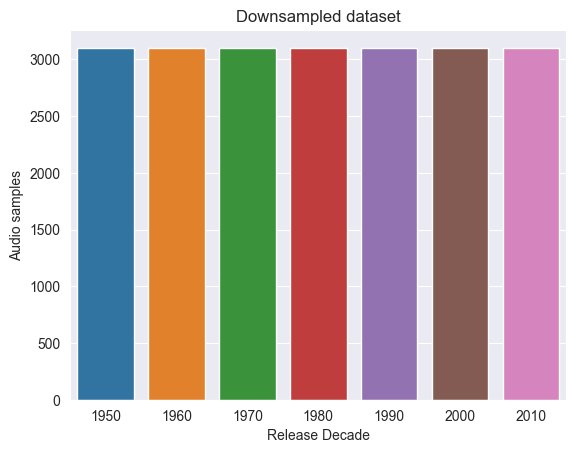

In [9]:
sns.countplot(x="label", data=df_sampled)
plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")
df_sampled.columns
df_sampled.to_csv('msd_sampled.csv')

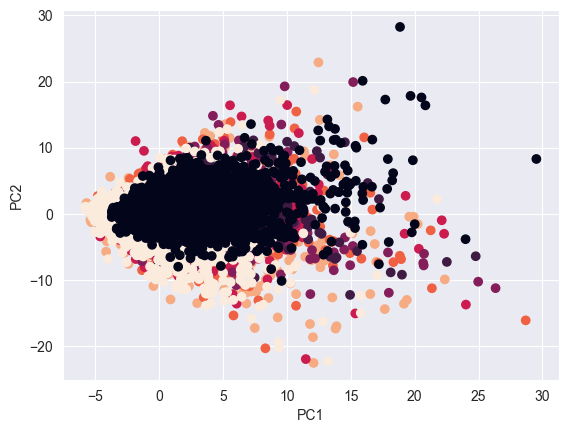

In [8]:
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = df_sampled.copy()
y = data['label'] # Extract feature values
X = data.drop(columns='label',axis=1) # Extract label values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform PCA with 2 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
X_pca.shape
X_pca.sample(5)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)





Accuracy: 0.3707114897536265


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

# Adapted Version
def initialization_of_population(size, n_feat):
    population = np.random.rand(size, n_feat) < 0.3
    return population.astype(np.bool_)

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        score = accuracy_score(Y_test,predictions)
        scores.append((score, chromosome))
    sorted_array = sorted(scores, key=lambda x: x[0],reverse = True)
    sorted_scores, sorted_population = zip(*sorted_array)
    return list(sorted_scores), list(sorted_population)

def selection(sorted_population,parent_chromosome_number):
    next_generation_population = []
    for i in range(parent_chromosome_number):
        next_generation_population.append(sorted_population[i])
    return next_generation_population

def crossover(parent_population):
    next_generation_population = []
    next_generation_population.extend(parent_population)
    for i in range(0,len(parent_population),2):
        new_chromosome = []
        child_1 = parent_population[i]
        child_2 = parent_population[i+1]
        crossover_point = len(child_1)//2
        new_chromosome = np.concatenate((child_1[:crossover_point],child_2[crossover_point:]))
        next_generation_population.append(new_chromosome)
    return next_generation_population

def mutation(population, mutation_rate,n_feat):
    next_generation_population = []
    mutation_number = int(mutation_rate*n_feat)
    for index,chromosome in enumerate(population):
        if index == 0:
            next_generation_population.append(chromosome)
            continue
        mutation_position = []
        new_chromosome = chromosome.copy()
        for i in range(0,mutation_number):
            position = randint(0,n_feat-1)
            mutation_position.append(position)
        for pos in mutation_position:
            new_chromosome[pos] = not chromosome[pos]
        next_generation_population.append(new_chromosome)
    return next_generation_population


def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train, X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initialization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[0])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


In [12]:
X_pca = pd.DataFrame(X_pca)
y = pd.DataFrame(y)
score1 = acc_score(X_pca,y)
score1

,Classifier,Accuracy
0,RadialSVM,0.408915
1,RandomForest,0.384049
2,GradientBoosting,0.372813
3,LinearSVM,0.366918
4,Logistic,0.362498
5,KNeighbors,0.338552
6,AdaBoost,0.335237
7,DecisionTree,0.243507


In [14]:
logmodel = svm.SVC(kernel='rbf')
X_pca = pd.DataFrame(X_pca)
Y = pd.DataFrame(y)
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
chromo_df_song,score_song=generations(X_pca,Y,size=200,n_feat=X_pca.shape[1],n_parents=100,mutation_rate=0.30,n_gen=100,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : 0.350218742804513
Best score in generation 2 : 0.37094174533732444
Best score in generation 3 : 0.37854017959935526
Best score in generation 4 : 0.3794612019341469
Best score in generation 5 : 0.3882109141146673
Best score in generation 6 : 0.3882109141146673
Best score in generation 7 : 0.3882109141146673
Best score in generation 8 : 0.39442781487451073
Best score in generation 9 : 0.39442781487451073
Best score in generation 10 : 0.39442781487451073
Best score in generation 11 : 0.39442781487451073
Best score in generation 12 : 0.39442781487451073
Best score in generation 13 : 0.3990329265484688
Best score in generation 14 : 0.3990329265484688
Best score in generation 15 : 0.3999539488832604
Best score in generation 16 : 0.3999539488832604
Best score in generation 17 : 0.3999539488832604
Best score in generation 18 : 0.3999539488832604
Best score in generation 19 : 0.3999539488832604
Best score in generation 20 : 0.3999539488832604
Best score in generatio

KeyboardInterrupt: 